In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


A new employee is evaluated at a level of 6.5. They say they made $160K at their last job. Does that fit with our pay scale?

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df[['Level']]
y = df.Salary

In [5]:
lin_reg = LinearRegression().fit(X, y)

In [6]:
poly_reg = PolynomialFeatures(degree=5)

In [7]:
X_poly = poly_reg.fit_transform(X)

In [8]:
lin_reg_2 = LinearRegression().fit(X_poly, y)

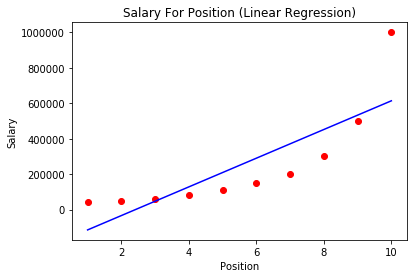

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Salary For Position (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary');

In [10]:
# Making a list of X from 1 to 10 to test every 0.1 step to get a more accurate line.
X_grid = pd.DataFrame(np.arange(1,10.1,0.1))

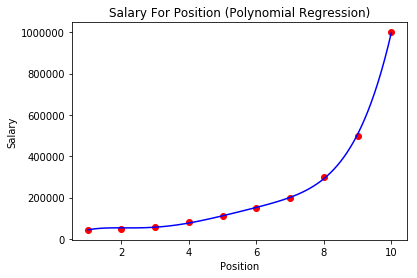

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Salary For Position (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary');

In [12]:
# Linear reg check
lin_reg.predict([[6.5]])

array([330378.78787879])

In [13]:
# Poly reg check
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765118])

If we used linear regression we would be over paying by a large error. Polynomial reg has a much closer fit for all positions. 